# Clustering for Blood Type

<b>Dataset:</b> <i>July_Blood.csv</i><br>
<a href="https://www.kaggle.com/ashydv/bank-customer-clustering-k-modes-clustering/notebook">KMode Reference</a>

**Attribute Information(Categorical)**<br>

* Donor ID: Unique ID assigned to the donor
* Gender: Male or Female
* Blood Type: O+, A+, B+, AB+
* Barangay: 28 barangays in Taguig
* District: Congressional district, 1 or 2 only
* Network: Communications provider
* Quarter:Q1 to Q4 (full year 2019)
* Month: January to December (full year 2019)
* Day of the Week: Sunday to Saturday
* Donor Count: volume of blood donated by a donor, 450cc
* Blood Drive Location: Facility
* Data: TPDH<br>

## Import Libraries

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

## Load the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\USER\Documents\Data Science\Capstone Project\Blood_Donation_2019.csv", index_col = 'Donor ID')

## Exploratory Data Analysis (EDA)

In [3]:
# Check if the Data loaded correctly
df.head()

,Gender,Blood Type,Barangay,District,Network,Quarter,Month,Day of the Week,Donor Count,Blood Drive Location
Donor ID,,,,,,,,,,
P1,Female,O+,Western Bicutan,2nd,TNT,Q1,January,Wed,450 cc,TPDH
P2,Female,A+,Hagonoy,1st,Others,Q1,January,Wed,450 cc,TPDH
P3,Female,B+,Tanyag,2nd,Globe/TM,Q1,January,Wed,450 cc,TPDH
P4,Male,O+,Western Bicutan,2nd,Globe/TM,Q1,January,Wed,450 cc,TPDH
P5,Female,B+,Upper Bicutan,2nd,Globe/TM,Q1,January,Wed,450 cc,TPDH


In [4]:
df.tail()

,Gender,Blood Type,Barangay,District,Network,Quarter,Month,Day of the Week,Donor Count,Blood Drive Location
Donor ID,,,,,,,,,,
P2008,Male,B+,Lower Bicutan,1st,TNT,Q4,December,Fri,450 cc,TPDH
P2009,Male,O+,Western Bicutan,2nd,Others,Q2,May,Thu,450 cc,Taguig ARMY Signal
P2010,Male,B+,Lower Bicutan,1st,Others,Q3,July,Wed,450 cc,TPDH
P2011,Male,B+,Upper Bicutan,2nd,Smart,Q4,October,Wed,450 cc,TPDH
P2012,Female,A+,Western Bicutan,2nd,Others,Q3,August,Mon,450 cc,TPDH


In [5]:
# Check the dimensions
df.shape

(1969, 10)

In [6]:
#Check the features
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1969 entries, P1 to P2012
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                1969 non-null   object
 1   Blood Type            1969 non-null   object
 2   Barangay              1969 non-null   object
 3   District              1819 non-null   object
 4   Network               1969 non-null   object
 5   Quarter               1969 non-null   object
 6   Month                 1969 non-null   object
 7   Day of the Week       1969 non-null   object
 8   Donor Count           1969 non-null   object
 9   Blood Drive Location  1969 non-null   object
dtypes: object(10)
memory usage: 169.2+ KB


In [7]:
#Check for Column Names
df.columns

Index(['Gender', 'Blood Type', 'Barangay', 'District', 'Network', 'Quarter',
       'Month', 'Day of the Week', 'Donor Count', 'Blood Drive Location'],
      dtype='object')

In [8]:
#Get the Stats on the Data
df.describe(include='all')

,Gender,Blood Type,Barangay,District,Network,Quarter,Month,Day of the Week,Donor Count,Blood Drive Location
count,1969,1969,1969,1819,1969,1969,1969,1969,1969,1969
unique,2,4,42,2,6,4,12,7,1,9
top,Male,O+,Western Bicutan,2nd,Globe/TM,Q4,June,Wed,450 cc,TPDH
freq,1474,899,617,1140,898,583,281,1382,1969,1344


In [9]:
# Importing Categorical Columns
df_donor = df[['Gender', 'Blood Type', 'Barangay', 'District', 'Network', 'Month', 'Blood Drive Location']]

## Data Inspection

In [10]:
df_donor.head()

,Gender,Blood Type,Barangay,District,Network,Month,Blood Drive Location
Donor ID,,,,,,,
P1,Female,O+,Western Bicutan,2nd,TNT,January,TPDH
P2,Female,A+,Hagonoy,1st,Others,January,TPDH
P3,Female,B+,Tanyag,2nd,Globe/TM,January,TPDH
P4,Male,O+,Western Bicutan,2nd,Globe/TM,January,TPDH
P5,Female,B+,Upper Bicutan,2nd,Globe/TM,January,TPDH


In [11]:
df_donor.tail()

,Gender,Blood Type,Barangay,District,Network,Month,Blood Drive Location
Donor ID,,,,,,,
P2008,Male,B+,Lower Bicutan,1st,TNT,December,TPDH
P2009,Male,O+,Western Bicutan,2nd,Others,May,Taguig ARMY Signal
P2010,Male,B+,Lower Bicutan,1st,Others,July,TPDH
P2011,Male,B+,Upper Bicutan,2nd,Smart,October,TPDH
P2012,Female,A+,Western Bicutan,2nd,Others,August,TPDH


In [12]:
df_donor.shape

(1969, 7)

In [13]:
df_donor.columns

Index(['Gender', 'Blood Type', 'Barangay', 'District', 'Network', 'Month',
       'Blood Drive Location'],
      dtype='object')

In [14]:
df_donor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1969 entries, P1 to P2012
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                1969 non-null   object
 1   Blood Type            1969 non-null   object
 2   Barangay              1969 non-null   object
 3   District              1819 non-null   object
 4   Network               1969 non-null   object
 5   Month                 1969 non-null   object
 6   Blood Drive Location  1969 non-null   object
dtypes: object(7)
memory usage: 123.1+ KB


## Data Cleaning

In [15]:
# Checking Null values
df_donor.isnull().sum()

Gender                    0
Blood Type                0
Barangay                  0
District                150
Network                   0
Month                     0
Blood Drive Location      0
dtype: int64

In [16]:
df_donor = df_donor.dropna()

In [17]:
df_donor = df_donor.drop(['District'], axis = 1)

In [18]:
df_donor.shape

(1819, 6)

In [19]:
df_donor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1819 entries, P1 to P2012
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                1819 non-null   object
 1   Blood Type            1819 non-null   object
 2   Barangay              1819 non-null   object
 3   Network               1819 non-null   object
 4   Month                 1819 non-null   object
 5   Blood Drive Location  1819 non-null   object
dtypes: object(6)
memory usage: 99.5+ KB


## Model Building

In [20]:
# First we will keep a copy of data
df_donor_copy = df_donor.copy()

### Data Preparation

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_donor = df_donor.apply(le.fit_transform)
df_donor.head()

,Gender,Blood Type,Barangay,Network,Month,Blood Drive Location
Donor ID,,,,,,
P1,0,3,27,5,4,3
P2,0,0,6,2,4,3
P3,0,2,22,1,4,3
P4,1,3,27,1,4,3
P5,0,2,24,1,4,3


### Additional library

In [22]:
from kmodes.kmodes import KModes

### Using K-Mode with "Cao" initialization

In [23]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 10, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_donor)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 102, cost: 4863.0


In [24]:
# Predicted Clusters
fitClusters_cao

array([0, 2, 0, ..., 1, 1, 2], dtype=uint16)

In [25]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_donor.columns

In [26]:
# Mode of the clusters
clusterCentroidsDf

,Gender,Blood Type,Barangay,Network,Month,Blood Drive Location
0,1,3,27,1,6,3
1,1,2,10,3,10,3
2,1,0,27,5,9,3


In [27]:
kmodes = km_cao.cluster_centroids_
shape = kmodes.shape
shape

(3, 6)

### Choosing K by comparing Cost against each K

In [28]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "cao", n_init = 10, verbose=1)
    kmode.fit_predict(df_donor)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5763.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 5763.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 5763.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 5763.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 5763.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 5763.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 5763.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100,

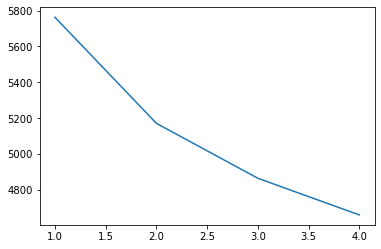

In [29]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

### Combining the predicted clusters with the original DF

In [30]:
df_donor = df_donor_copy.reset_index()

In [31]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_donor, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index'], axis = 1)

In [32]:
combinedDf.head()

,Donor ID,Gender,Blood Type,Barangay,Network,Month,Blood Drive Location,cluster_predicted
0,P1,Female,O+,Western Bicutan,TNT,January,TPDH,0
1,P2,Female,A+,Hagonoy,Others,January,TPDH,2
2,P3,Female,B+,Tanyag,Globe/TM,January,TPDH,0
3,P4,Male,O+,Western Bicutan,Globe/TM,January,TPDH,0
4,P5,Female,B+,Upper Bicutan,Globe/TM,January,TPDH,0


In [33]:
label = km_cao.labels_

In [34]:
combinedDf['cluster_name'] = ['cluster1' if x == 0 else\
                           'cluster2' if x == 1 else\
                           'cluster3' if x == 2 else\
                           'cluster4' for x in label]

Text(0.5, 0, '')

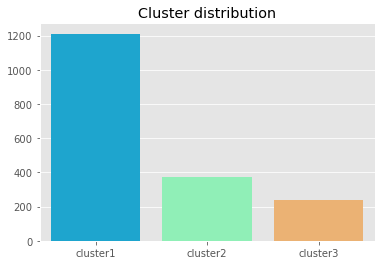

In [35]:
plt.style.use('ggplot')
sns.countplot(combinedDf['cluster_name'],order=combinedDf['cluster_name'].value_counts().index,palette = 'rainbow')
plt.title('Cluster distribution')
plt.ylabel(None)
plt.xlabel(None)

### Cluster Identification

In [36]:
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 2]

In [37]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211 entries, 0 to 1815
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Donor ID              1211 non-null   object
 1   Gender                1211 non-null   object
 2   Blood Type            1211 non-null   object
 3   Barangay              1211 non-null   object
 4   Network               1211 non-null   object
 5   Month                 1211 non-null   object
 6   Blood Drive Location  1211 non-null   object
 7   cluster_predicted     1211 non-null   uint16
 8   cluster_name          1211 non-null   object
dtypes: object(8), uint16(1)
memory usage: 87.5+ KB


In [38]:
cluster_1.head()

,Donor ID,Gender,Blood Type,Barangay,Network,Month,Blood Drive Location,cluster_predicted,cluster_name
0,P1,Female,O+,Western Bicutan,TNT,January,TPDH,0,cluster1
2,P3,Female,B+,Tanyag,Globe/TM,January,TPDH,0,cluster1
3,P4,Male,O+,Western Bicutan,Globe/TM,January,TPDH,0,cluster1
4,P5,Female,B+,Upper Bicutan,Globe/TM,January,TPDH,0,cluster1
5,P6,Male,B+,Tanyag,Globe/TM,January,TPDH,0,cluster1


In [39]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 18 to 1817
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Donor ID              371 non-null    object
 1   Gender                371 non-null    object
 2   Blood Type            371 non-null    object
 3   Barangay              371 non-null    object
 4   Network               371 non-null    object
 5   Month                 371 non-null    object
 6   Blood Drive Location  371 non-null    object
 7   cluster_predicted     371 non-null    uint16
 8   cluster_name          371 non-null    object
dtypes: object(8), uint16(1)
memory usage: 26.8+ KB


In [40]:
cluster_2.head()

,Donor ID,Gender,Blood Type,Barangay,Network,Month,Blood Drive Location,cluster_predicted,cluster_name
18,P19,Female,B+,Tuktukan,TNT,January,TPDH,1,cluster2
21,P22,Male,B+,Western Bicutan,Smart,January,TPDH,1,cluster2
22,P23,Male,B+,Maharlika Village,Smart,January,TPDH,1,cluster2
24,P25,Male,B+,Western Bicutan,Smart,January,TPDH,1,cluster2
30,P31,Male,B+,Western Bicutan,Smart,January,TPDH,1,cluster2


In [41]:
cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 1 to 1818
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Donor ID              237 non-null    object
 1   Gender                237 non-null    object
 2   Blood Type            237 non-null    object
 3   Barangay              237 non-null    object
 4   Network               237 non-null    object
 5   Month                 237 non-null    object
 6   Blood Drive Location  237 non-null    object
 7   cluster_predicted     237 non-null    uint16
 8   cluster_name          237 non-null    object
dtypes: object(8), uint16(1)
memory usage: 17.1+ KB


In [42]:
cluster_3.head()

,Donor ID,Gender,Blood Type,Barangay,Network,Month,Blood Drive Location,cluster_predicted,cluster_name
1,P2,Female,A+,Hagonoy,Others,January,TPDH,2,cluster3
10,P11,Male,A+,Western Bicutan,Smart,January,TPDH,2,cluster3
20,P21,Male,A+,Bagumbayan,TNT,January,TPDH,2,cluster3
26,P27,Male,A+,Western Bicutan,Smart,January,TPDH,2,cluster3
39,P40,Male,A+,Western Bicutan,TNT,January,TPDH,2,cluster3


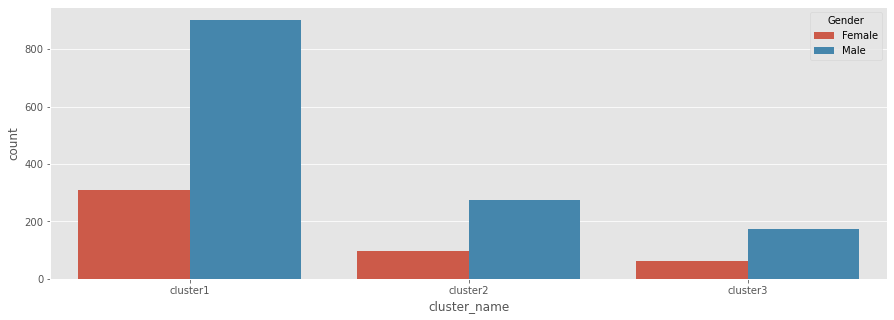

In [43]:
plt.style.use('ggplot')
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_name'],order=combinedDf['cluster_name'].value_counts().index,hue=combinedDf['Gender'])
plt.show()

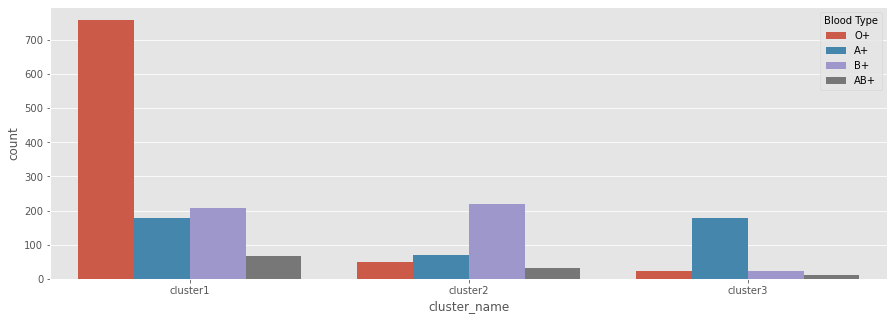

In [44]:
plt.style.use('ggplot')
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_name'],order=combinedDf['cluster_name'].value_counts().index,hue=combinedDf['Blood Type'])
plt.show()

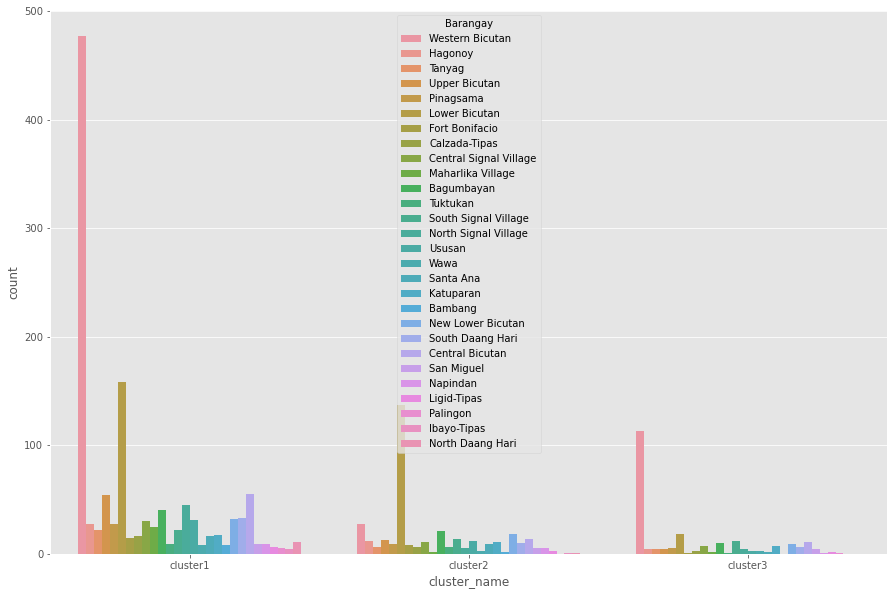

In [45]:
plt.style.use('ggplot')
plt.subplots(figsize = (15,10))
sns.countplot(x=combinedDf['cluster_name'],order=combinedDf['cluster_name'].value_counts().index,hue=combinedDf['Barangay'])
plt.show()

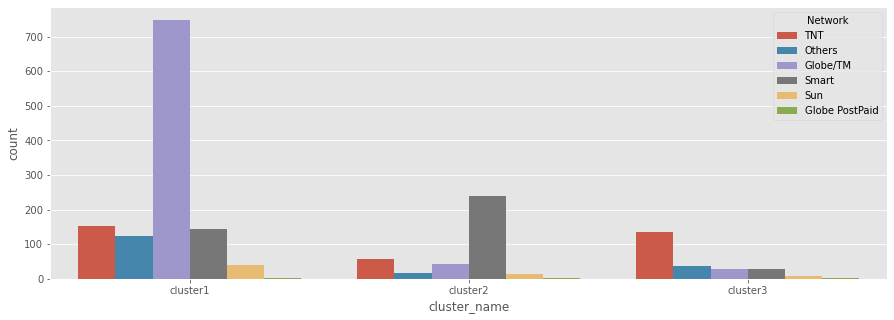

In [46]:
plt.style.use('ggplot')
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_name'],order=combinedDf['cluster_name'].value_counts().index,hue=combinedDf['Network'])
plt.show()

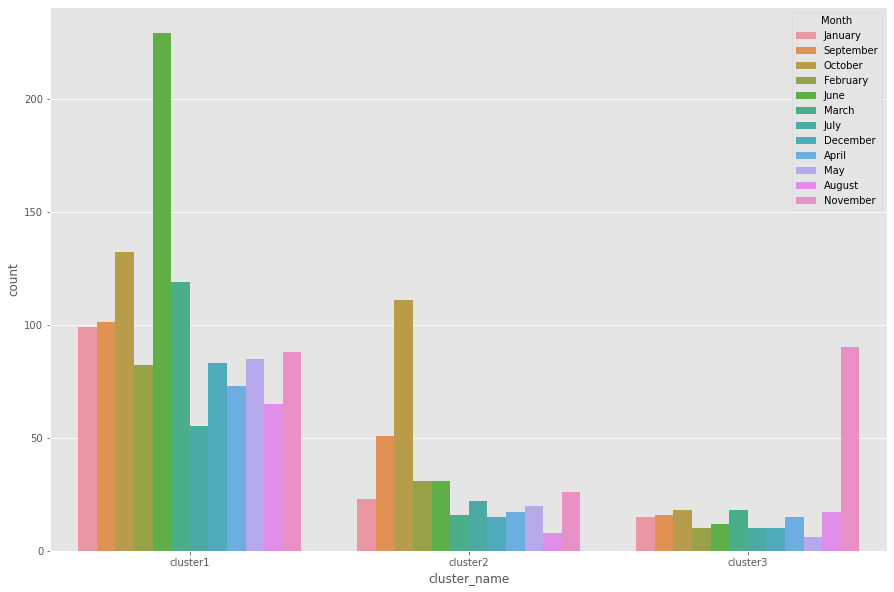

In [47]:
plt.style.use('ggplot')
plt.subplots(figsize = (15,10))
sns.countplot(x=combinedDf['cluster_name'],order=combinedDf['cluster_name'].value_counts().index,hue=combinedDf['Month'])
plt.show()

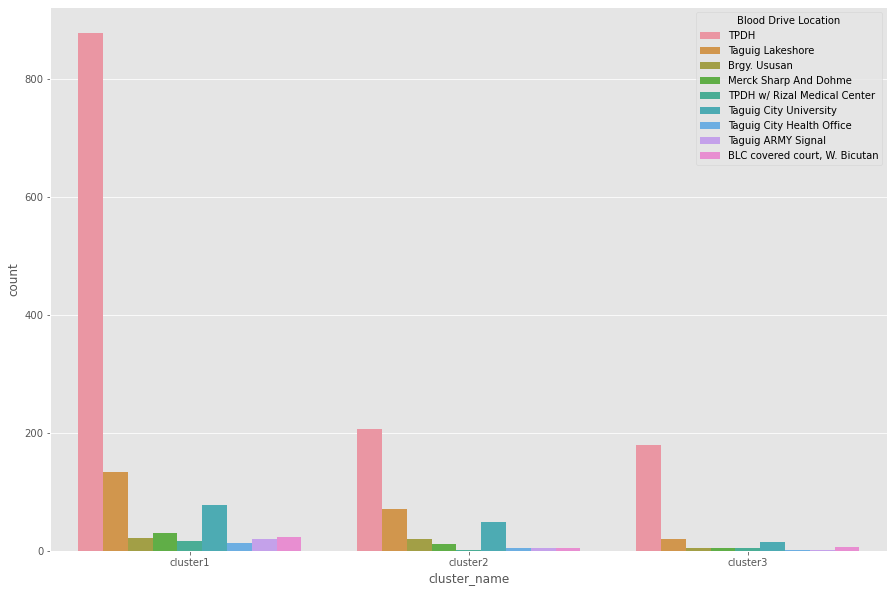

In [48]:
plt.style.use('ggplot')
plt.subplots(figsize = (15,10))
sns.countplot(x=combinedDf['cluster_name'],order=combinedDf['cluster_name'].value_counts().index,hue=combinedDf['Blood Drive Location'])
plt.show()

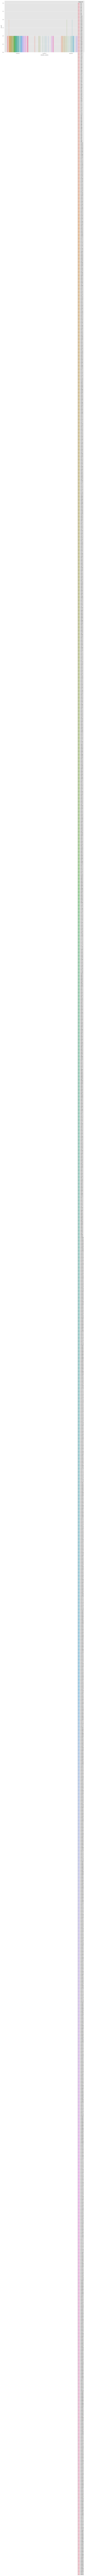

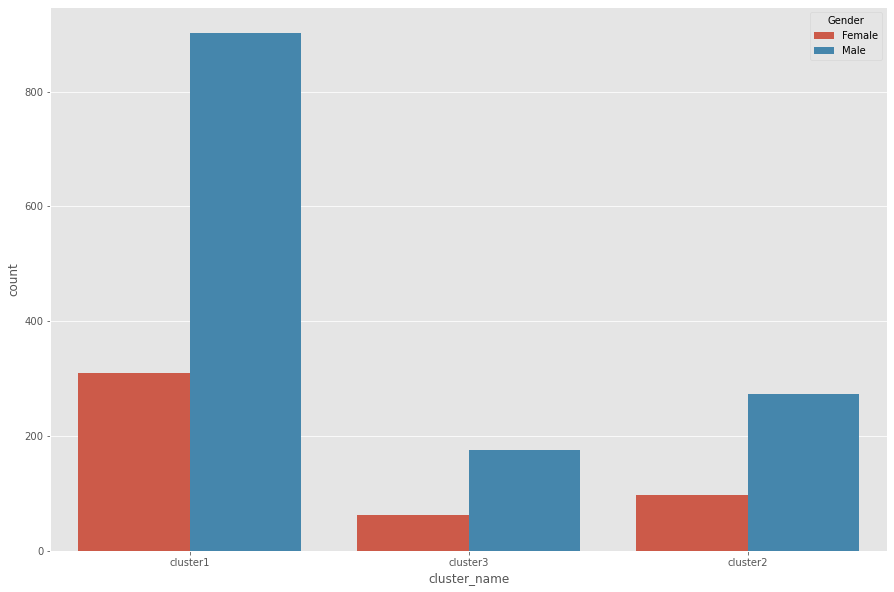

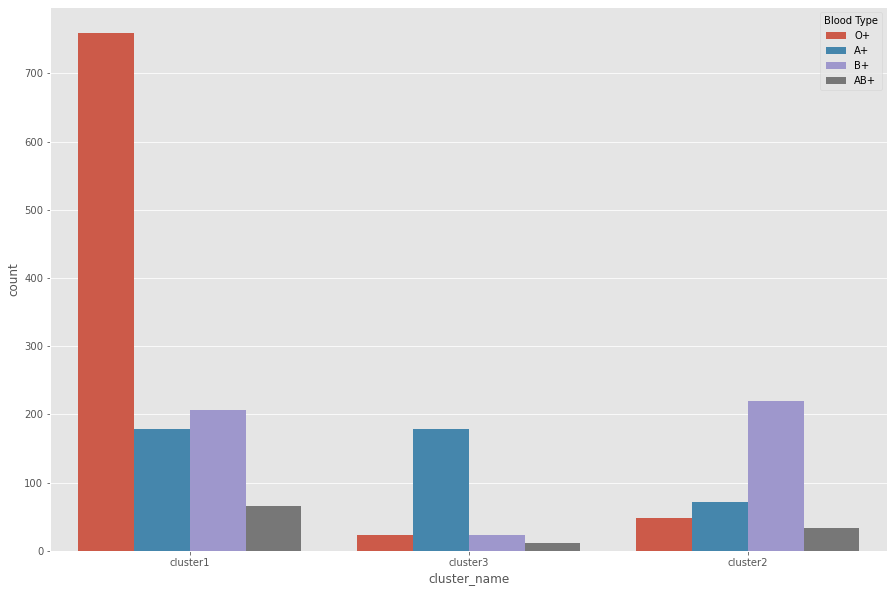

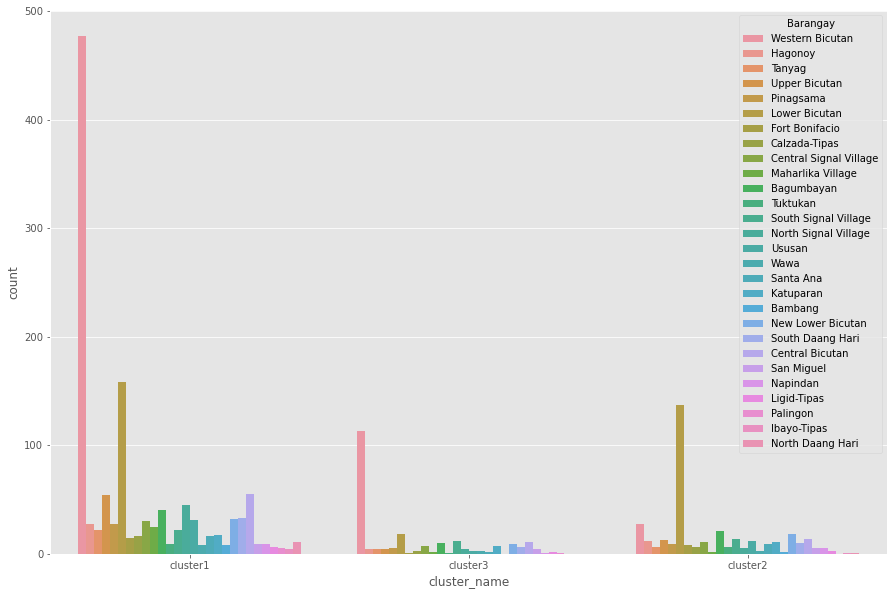

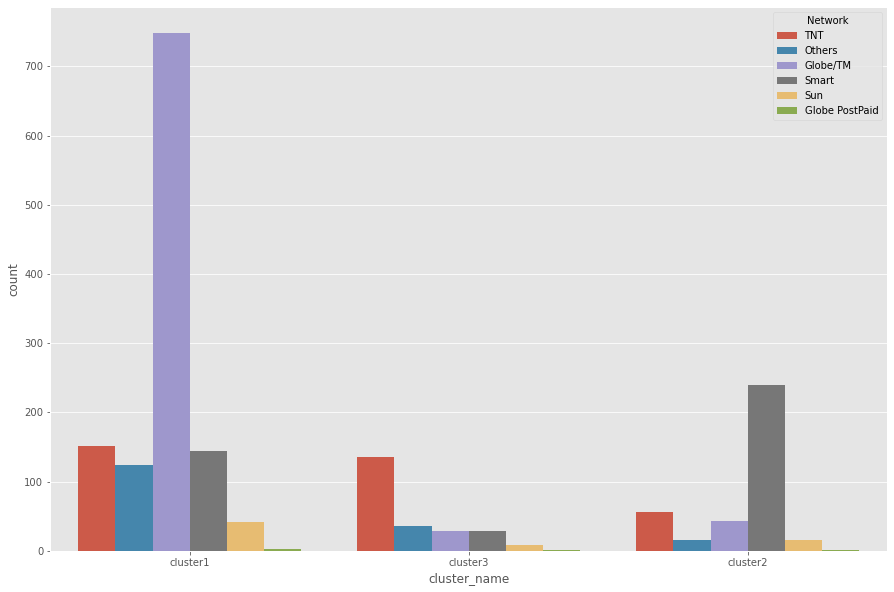

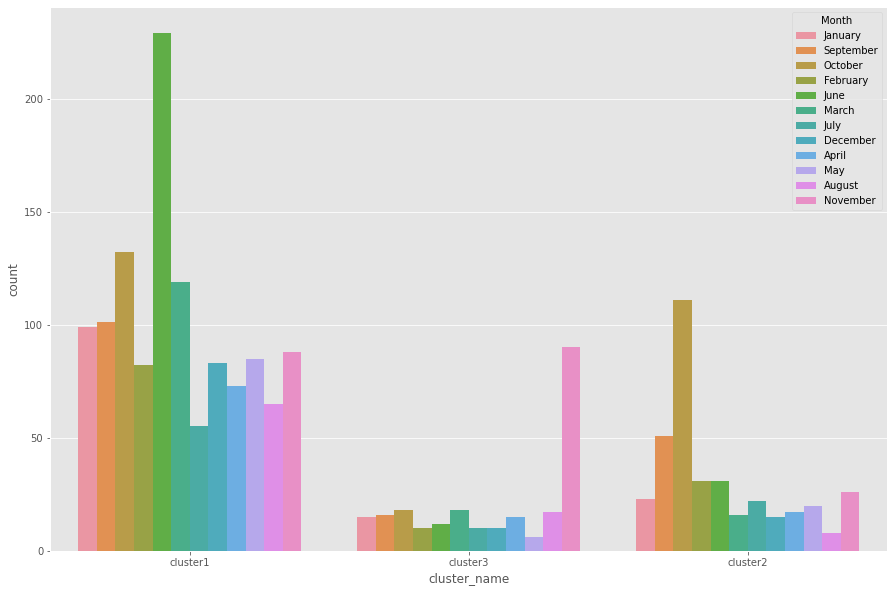

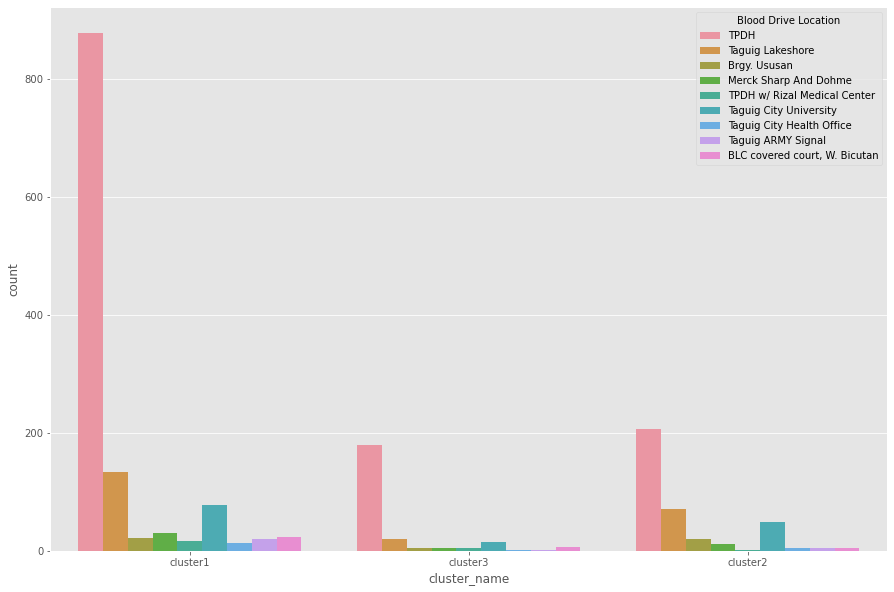

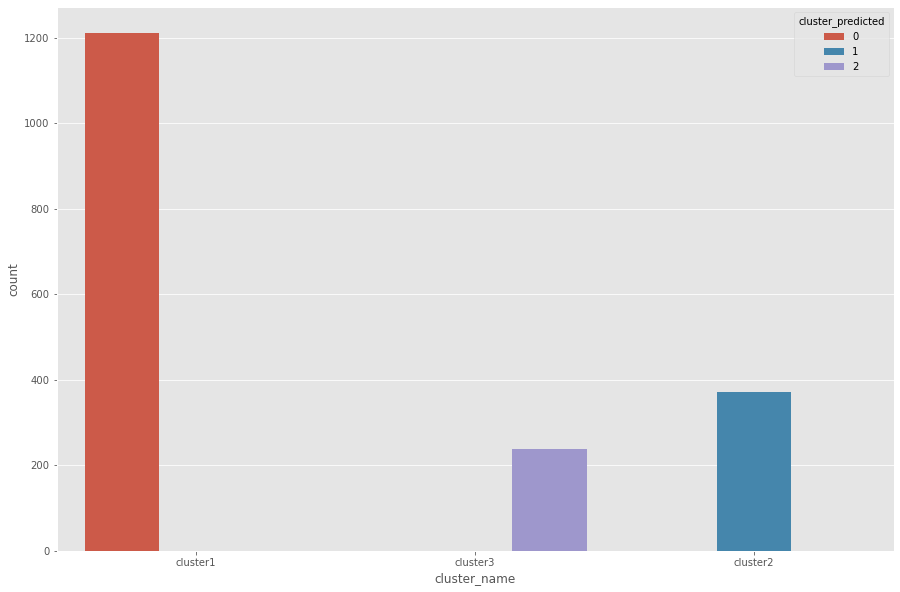

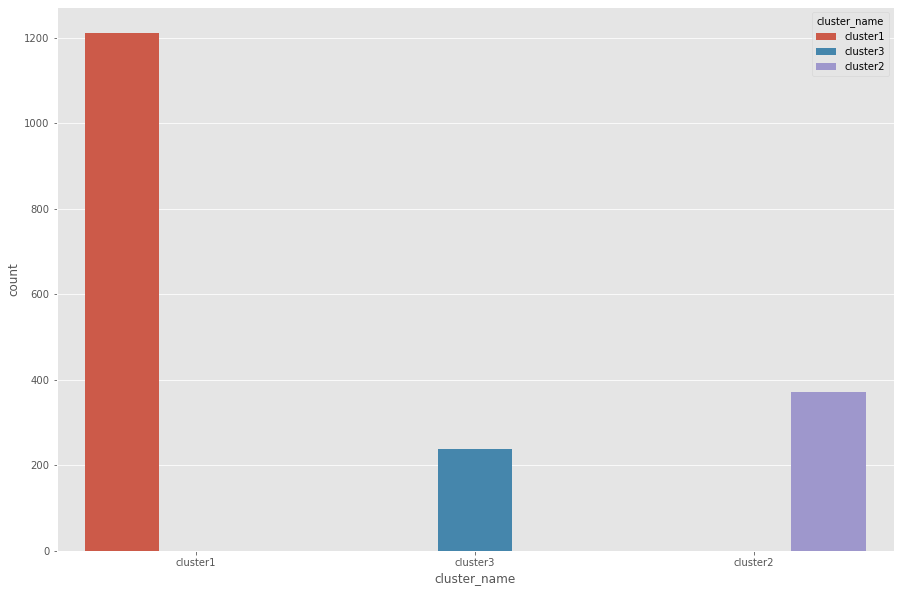

In [49]:
for col in combinedDf:
    plt.style.use('ggplot')
    plt.subplots(figsize = (15,10))
    sns.countplot(x='cluster_name', hue=col, data = combinedDf)
    plt.show()

In [50]:
combinedDf.to_csv(r'C:\Users\USER\Documents\Data Science\Capstone Project\Cao_v4.csv')